In [1]:
import torch
import torch.nn as nn       # 建立神經網路用
import torch.optim as optim # 建立優化器用
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# 數據預處理
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# 下載 MNIST 數據集
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [3]:
x_train = train_dataset.data    # 圖片
y_train = train_dataset.targets # 標籤
print(f'x_train size: {x_train.size()}')
print(f'y_train size: {y_train.size()}')

x_train size: torch.Size([60000, 28, 28])
y_train size: torch.Size([60000])


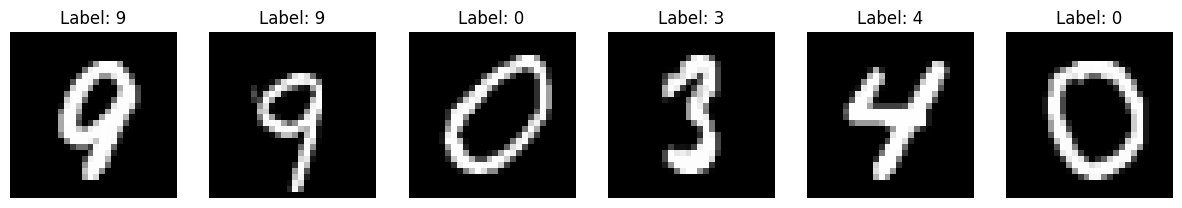

In [4]:
fig, axs = plt.subplots(1, 6, figsize=(15, 3))
for i in range(6):
    idx = random.randint(0, len(x_train) - 1)
    img, label = x_train[idx], y_train[idx]
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(f'Label: {label}')
    axs[i].axis('off')
plt.show()

In [8]:
class DNN(nn.Module):
        def __init__(self, input_shape, output_shape):
            super(DNN, self).__init__()
            self.fc1 = nn.Linear(input_shape, 512)  # 輸入->隱藏
            self.fc2 = nn.Linear(512, 256)          # 隱藏->隱藏
            self.fc3 = nn.Linear(256, 128)          # 隱藏->隱藏
            self.fc4 = nn.Linear(128, output_shape) # 隱藏->輸出
            self.relu = nn.ReLU()  # 激勵函數
        def forward(self, x):
            x = x.view(-1, 28 * 28)
            x = self.relu(self.fc1(x))
            x = self.relu(self.fc2(x))
            x = self.relu(self.fc3(x))
            x = self.fc4(x)
            return x
        
# 定義損失函數和優化器
model = DNN(x_train.shape[1] * x_train.shape[2], len(set(y_train)))
criterion = nn.CrossEntropyLoss()        # 計算分類任務時通常會使用CrossEntropyLoss
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam是一個通用性極高的優化器

In [9]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader):
            # 清空梯度
            optimizer.zero_grad()

            # 前向傳播
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # 反向傳播和優化
            loss.backward()
            optimizer.step()

            # 累計損失
            running_loss += loss.item() # item()張量轉換成純量
            if i % 100 == 99:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}')
                running_loss = 0.0
    print('Finished Training')
    
train_model(model, train_loader, criterion, optimizer, num_epochs=5)

Epoch [1/5], Step [100/938], Loss: 2.0323
Epoch [1/5], Step [200/938], Loss: 0.4895
Epoch [1/5], Step [300/938], Loss: 0.3928
Epoch [1/5], Step [400/938], Loss: 0.3448
Epoch [1/5], Step [500/938], Loss: 0.2967
Epoch [1/5], Step [600/938], Loss: 0.2752
Epoch [1/5], Step [700/938], Loss: 0.2475
Epoch [1/5], Step [800/938], Loss: 0.2227
Epoch [1/5], Step [900/938], Loss: 0.2256
Epoch [2/5], Step [100/938], Loss: 0.2071
Epoch [2/5], Step [200/938], Loss: 0.1937
Epoch [2/5], Step [300/938], Loss: 0.1689
Epoch [2/5], Step [400/938], Loss: 0.1636
Epoch [2/5], Step [500/938], Loss: 0.1626
Epoch [2/5], Step [600/938], Loss: 0.1461
Epoch [2/5], Step [700/938], Loss: 0.1473
Epoch [2/5], Step [800/938], Loss: 0.1577
Epoch [2/5], Step [900/938], Loss: 0.1534
Epoch [3/5], Step [100/938], Loss: 0.1163
Epoch [3/5], Step [200/938], Loss: 0.1251
Epoch [3/5], Step [300/938], Loss: 0.1324
Epoch [3/5], Step [400/938], Loss: 0.1164
Epoch [3/5], Step [500/938], Loss: 0.1213
Epoch [3/5], Step [600/938], Loss:

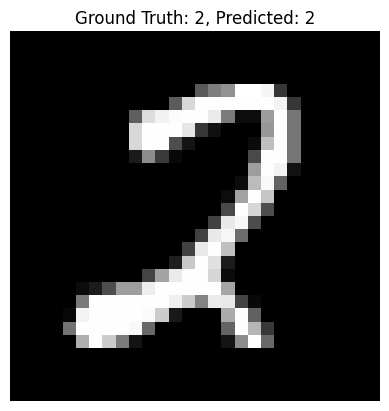

In [11]:
def predict_random_image(model, test_dataset):
    # 隨機選擇一張測試集圖片
    idx = random.randint(0, len(test_dataset) - 1)
    img, label = test_dataset[idx]
    img_reshaped = img.view(-1, 28 * 28)

    # 進行預測
    model.eval()
    with torch.no_grad():
        output = model(img_reshaped)
        _, predicted = torch.max(output.data, 1)

    # 繪製圖片並顯示預測結果
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f'Ground Truth: {label}, Predicted: {predicted.item()}')
    plt.axis('off')
    plt.show()

predict_random_image(model, test_dataset)